模型训练

三、逻辑回归

1、估计概率

2、决策边界

四、软最大回归（用于多分类问题）

代价函数：交叉熵（经常用于衡量一组估计的类概率与目标类的匹配程度）

In [1]:
from sklearn import datasets
import numpy as np
import os
os.environ["OMP_NUM_THREADS"]="7"
import pandas as pd
import matplotlib.pyplot as plt
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] # petal width（花瓣宽度）
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0 训练一个二进制分类器

C:\Users\youyiting\AppData\Local\Temp\ipykernel_12456\3944770023.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0 训练一个二进制分类器


In [8]:
data_=pd.DataFrame(iris["data"])
print(iris.DESCR)
data_.head()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

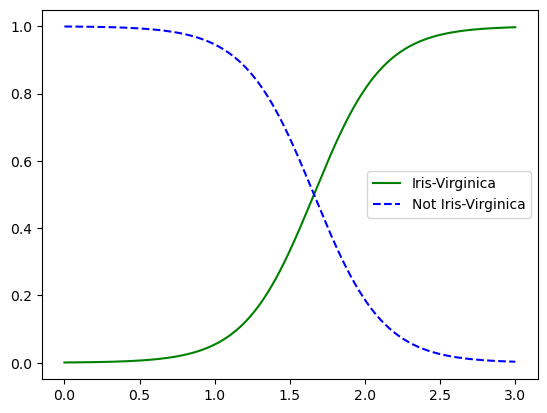

array([1, 0])

In [4]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)#生成0-3cm的花瓣宽度
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.show()
log_reg.predict([[1.7],[1.5]])

In [16]:
#训练两个特征的分类
from sklearn.linear_model import LogisticRegression
log_reg_ = LogisticRegression()
X_to_train=iris["data"][:,2:]
y_to_train=(iris["target"]==2).astype(np.int)
log_reg_.fit(X_to_train,y_to_train)
log_reg_.predict(np.array([1.5,1.7]).reshape(1,-1))

C:\Users\youyiting\AppData\Local\Temp\ipykernel_12456\2860595901.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_to_train=(iris["target"]==2).astype(np.int)


array([0])

In [18]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)
print(softmax_reg.predict([[5, 2]]))
softmax_reg.predict_proba([[5, 2]])


[2]


array([[6.21626371e-07, 5.73689802e-02, 9.42630398e-01]])